In [5]:
import tensorflow as tf
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.model_selection import train_test_split
tf.set_random_seed(3)
np.random.seed(3)
import matplotlib.pyplot as plt
%matplotlib inline  

In [6]:
data = pd.read_csv('../Data/Mobile Price Classification.csv')

In [3]:
# Data Normalization

X = data[data.columns[:-1]]

X = X.values #returns a numpy array
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(X)
X = pd.DataFrame(x_scaled,columns=data.columns[:-1])

y = data[['price_range']]

In [4]:
from sklearn.preprocessing import OneHotEncoder
encode = OneHotEncoder()
encode.fit([[0],[1],[2],[3]])

OneHotEncoder(categorical_features='all', dtype=<class 'numpy.float64'>,
       handle_unknown='error', n_values='auto', sparse=True)

In [5]:
def one_hot_0(x):
    re = encode.transform([[x]]).toarray()
    re.astype(int)
    return re[0][0]

def one_hot_1(x):
    re = encode.transform([[x]]).toarray()
    re.astype(int)
    return re[0][1]

def one_hot_2(x):
    re = encode.transform([[x]]).toarray()
    re.astype(int)
    return re[0][2]

def one_hot_3(x):
    re = encode.transform([[x]]).toarray()
    re.astype(int)
    return re[0][3]

In [6]:
y['price_range0'] = y['price_range'].apply(one_hot_0)
y['price_range1'] = y['price_range'].apply(one_hot_1)
y['price_range2'] = y['price_range'].apply(one_hot_2)
y['price_range3'] = y['price_range'].apply(one_hot_3)

c:\users\craig\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
c:\users\craig\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\users\craig\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

In [7]:
# Split the data into test and train set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30, random_state=3)

In [8]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train[y_train.columns[1:5]])
y_test = np.array(y_test[y_test.columns[1:5]])

In [9]:
accuracy_list=[]
def train_nn(x,model):
    pred = model(x)
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=pred, labels=y))
    # Array dtype float > int
    # https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.ndarray.astype.html
    optimizer = tf.train.AdamOptimizer().minimize(cost)
    
    epoch = 100
    #with tf.Session(config=tf.ConfigProto(log_device_placement=True)) as sess:
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        
        for ep in range(epoch):
            epoch_loss = 0
            for i in range(int(X_train.shape[0]/batch_size)):
                beg = i*batch_size
                end = beg + batch_size
                ep_x = X_train[beg:end]
                ep_y = y_train[beg:end]
#                 DF                
#                 ep_x = X_train[beg:end]
#                 ep_y = y_train[y_train.columns[1:5]][beg:end]

#                 x = X_train[beg:end]
#                 y = y_train[beg:end]                
#                 UnboundLocalError: local variable 'y' referenced before assignment
                
                qq, c = sess.run([optimizer,cost],feed_dict= {x:ep_x,y:ep_y})
#                 ValueError: setting an array element with a sequence.
#                 TypeError: 'DataFrame' objects are mutable, thus they cannot be hashed
                epoch_loss += c
            #print('Epoch',ep, 'completed out of', epoch, 'loss',epoch_loss)
        correct = tf.equal(tf.argmax(pred,1),tf.argmax(y,1))
        accuracy = tf.reduce_mean(tf.cast(correct,'float'))
        Acc = accuracy.eval({x:X_test, y:y_test})
        accuracy_list.append(Acc)
        print('Acc:',Acc)

In [10]:
n_node_hl1 = 100

n_classes = 4
batch_size = 50

x = tf.placeholder('float', [None,20])
y = tf.placeholder('int32',[None,4])   ## int didn't work
def nn_model1(data):
    hidden_1 = {'weights': tf.Variable(tf.random_normal([20,n_node_hl1])),
               'biases': tf.Variable(tf.random_normal([n_node_hl1]))}
    
    output_l = {'weights': tf.Variable(tf.random_normal([n_node_hl1,n_classes])),
             'biases': tf.Variable(tf.random_normal([n_classes]))}
    
    
    l1 = tf.add(tf.matmul(data,hidden_1['weights']),hidden_1['biases'])
    l1 = tf.nn.sigmoid(l1)

    output = tf.add(tf.matmul(l1, output_l['weights']),output_l['biases'])
    
    return output

In [11]:
n_node_hl1 = 100
n_node_hl2 = 100

n_classes = 4
batch_size = 50

x = tf.placeholder('float', [None,20])
y = tf.placeholder('int32',[None,4])   ## int didn't work
def nn_model2(data):
    hidden_1 = {'weights': tf.Variable(tf.random_normal([20,n_node_hl1])),
               'biases': tf.Variable(tf.random_normal([n_node_hl1]))}
    
    hidden_2 = {'weights': tf.Variable(tf.random_normal([n_node_hl1,n_node_hl2])),
               'biases': tf.Variable(tf.random_normal([n_node_hl2]))}
    
    output_l = {'weights': tf.Variable(tf.random_normal([n_node_hl2,n_classes])),
             'biases': tf.Variable(tf.random_normal([n_classes]))}
    
    
    l1 = tf.add(tf.matmul(data,hidden_1['weights']),hidden_1['biases'])
    l1 = tf.nn.sigmoid(l1)

    l2 = tf.add(tf.matmul(l1,hidden_2['weights']),hidden_2['biases'])
    l2 = tf.nn.sigmoid(l2)
    
    output = tf.add(tf.matmul(l2, output_l['weights']),output_l['biases'])
    
    return output

In [12]:
n_node_hl1 = 100
n_node_hl2 = 100
n_node_hl3 = 100

n_classes = 4
batch_size = 50

x = tf.placeholder('float', [None,20])
y = tf.placeholder('int32',[None,4])   ## int didn't work
def nn_model3(data):
    hidden_1 = {'weights': tf.Variable(tf.random_normal([20,n_node_hl1])),
               'biases': tf.Variable(tf.random_normal([n_node_hl1]))}
    
    hidden_2 = {'weights': tf.Variable(tf.random_normal([n_node_hl1,n_node_hl2])),
               'biases': tf.Variable(tf.random_normal([n_node_hl2]))}
    
    hidden_3 = {'weights': tf.Variable(tf.random_normal([n_node_hl2,n_node_hl3])),
               'biases': tf.Variable(tf.random_normal([n_node_hl3]))}
    
    output_l = {'weights': tf.Variable(tf.random_normal([n_node_hl3,n_classes])),
             'biases': tf.Variable(tf.random_normal([n_classes]))}
    
    
    l1 = tf.add(tf.matmul(data,hidden_1['weights']),hidden_1['biases'])
    l1 = tf.nn.sigmoid(l1)

    l2 = tf.add(tf.matmul(l1,hidden_2['weights']),hidden_2['biases'])
    l2 = tf.nn.sigmoid(l2)
    
    l3 = tf.add(tf.matmul(l2,hidden_3['weights']),hidden_3['biases'])
    l3 = tf.nn.sigmoid(l3)
    
    output = tf.add(tf.matmul(l3, output_l['weights']),output_l['biases'])
    
    return output

In [13]:
n_node_hl1 = 100
n_node_hl2 = 100
n_node_hl3 = 100
n_node_hl4 = 100

n_classes = 4
batch_size = 50

x = tf.placeholder('float', [None,20])
y = tf.placeholder('int32',[None,4])   ## int didn't work

def nn_model4(data):
    hidden_1 = {'weights': tf.Variable(tf.random_normal([20,n_node_hl1])),
               'biases': tf.Variable(tf.random_normal([n_node_hl1]))}
    
    hidden_2 = {'weights': tf.Variable(tf.random_normal([n_node_hl1,n_node_hl2])),
               'biases': tf.Variable(tf.random_normal([n_node_hl2]))}
    
    hidden_3 = {'weights': tf.Variable(tf.random_normal([n_node_hl2,n_node_hl3])),
               'biases': tf.Variable(tf.random_normal([n_node_hl3]))}
    
    hidden_4 = {'weights': tf.Variable(tf.random_normal([n_node_hl3,n_node_hl4])),
               'biases': tf.Variable(tf.random_normal([n_node_hl4]))}
    
    output_l = {'weights': tf.Variable(tf.random_normal([n_node_hl4,n_classes])),
             'biases': tf.Variable(tf.random_normal([n_classes]))}
    
    
    l1 = tf.add(tf.matmul(data,hidden_1['weights']),hidden_1['biases'])
    l1 = tf.nn.sigmoid(l1)

    l2 = tf.add(tf.matmul(l1,hidden_2['weights']),hidden_2['biases'])
    l2 = tf.nn.sigmoid(l2)
    
    l3 = tf.add(tf.matmul(l2,hidden_3['weights']),hidden_3['biases'])
    l3 = tf.nn.sigmoid(l3)
    
    l4 = tf.add(tf.matmul(l3,hidden_4['weights']),hidden_4['biases'])
    l4 = tf.nn.sigmoid(l4)
    
    output = tf.add(tf.matmul(l4, output_l['weights']),output_l['biases'])
    
    return output

In [14]:
n_node_hl1 = 100
n_node_hl2 = 100
n_node_hl3 = 100
n_node_hl4 = 100
n_node_hl5 = 100

n_classes = 4
batch_size = 50

x = tf.placeholder('float', [None,20])
y = tf.placeholder('int32',[None,4])   ## int didn't work

def nn_model5(data):
    hidden_1 = {'weights': tf.Variable(tf.random_normal([20,n_node_hl1])),
               'biases': tf.Variable(tf.random_normal([n_node_hl1]))}
    
    hidden_2 = {'weights': tf.Variable(tf.random_normal([n_node_hl1,n_node_hl2])),
               'biases': tf.Variable(tf.random_normal([n_node_hl2]))}
    
    hidden_3 = {'weights': tf.Variable(tf.random_normal([n_node_hl2,n_node_hl3])),
               'biases': tf.Variable(tf.random_normal([n_node_hl3]))}
    
    hidden_4 = {'weights': tf.Variable(tf.random_normal([n_node_hl3,n_node_hl4])),
               'biases': tf.Variable(tf.random_normal([n_node_hl4]))}
    
    hidden_5 = {'weights': tf.Variable(tf.random_normal([n_node_hl4,n_node_hl5])),
               'biases': tf.Variable(tf.random_normal([n_node_hl5]))}
    
    output_l = {'weights': tf.Variable(tf.random_normal([n_node_hl5,n_classes])),
             'biases': tf.Variable(tf.random_normal([n_classes]))}
    
    
    l1 = tf.add(tf.matmul(data,hidden_1['weights']),hidden_1['biases'])
    l1 = tf.nn.sigmoid(l1)

    l2 = tf.add(tf.matmul(l1,hidden_2['weights']),hidden_2['biases'])
    l2 = tf.nn.sigmoid(l2)
    
    l3 = tf.add(tf.matmul(l2,hidden_3['weights']),hidden_3['biases'])
    l3 = tf.nn.sigmoid(l3)
    
    l4 = tf.add(tf.matmul(l3,hidden_4['weights']),hidden_4['biases'])
    l4 = tf.nn.sigmoid(l4)
    
    l5 = tf.add(tf.matmul(l4,hidden_5['weights']),hidden_5['biases'])
    l5 = tf.nn.sigmoid(l5)
    
    output = tf.add(tf.matmul(l5, output_l['weights']),output_l['biases'])
    
    return output

In [15]:
n_node_hl1 = 100
n_node_hl2 = 100
n_node_hl3 = 100
n_node_hl4 = 100
n_node_hl5 = 100
n_node_hl6 = 100

n_classes = 4
batch_size = 50

x = tf.placeholder('float', [None,20])
y = tf.placeholder('int32',[None,4])   ## int didn't work

def nn_model6(data):
    hidden_1 = {'weights': tf.Variable(tf.random_normal([20,n_node_hl1])),
               'biases': tf.Variable(tf.random_normal([n_node_hl1]))}
    
    hidden_2 = {'weights': tf.Variable(tf.random_normal([n_node_hl1,n_node_hl2])),
               'biases': tf.Variable(tf.random_normal([n_node_hl2]))}
    
    hidden_3 = {'weights': tf.Variable(tf.random_normal([n_node_hl2,n_node_hl3])),
               'biases': tf.Variable(tf.random_normal([n_node_hl3]))}
    
    hidden_4 = {'weights': tf.Variable(tf.random_normal([n_node_hl3,n_node_hl4])),
               'biases': tf.Variable(tf.random_normal([n_node_hl4]))}
    
    hidden_5 = {'weights': tf.Variable(tf.random_normal([n_node_hl4,n_node_hl5])),
               'biases': tf.Variable(tf.random_normal([n_node_hl5]))}
    
    hidden_6 = {'weights': tf.Variable(tf.random_normal([n_node_hl5,n_node_hl6])),
               'biases': tf.Variable(tf.random_normal([n_node_hl6]))}
    
    output_l = {'weights': tf.Variable(tf.random_normal([n_node_hl6,n_classes])),
             'biases': tf.Variable(tf.random_normal([n_classes]))}
    
    
    l1 = tf.add(tf.matmul(data,hidden_1['weights']),hidden_1['biases'])
    l1 = tf.nn.sigmoid(l1)

    l2 = tf.add(tf.matmul(l1,hidden_2['weights']),hidden_2['biases'])
    l2 = tf.nn.sigmoid(l2)
    
    l3 = tf.add(tf.matmul(l2,hidden_3['weights']),hidden_3['biases'])
    l3 = tf.nn.sigmoid(l3)
    
    l4 = tf.add(tf.matmul(l3,hidden_4['weights']),hidden_4['biases'])
    l4 = tf.nn.sigmoid(l4)
    
    l5 = tf.add(tf.matmul(l4,hidden_5['weights']),hidden_5['biases'])
    l5 = tf.nn.sigmoid(l5)
    
    l6 = tf.add(tf.matmul(l5,hidden_6['weights']),hidden_6['biases'])
    l6 = tf.nn.sigmoid(l6)
    
    output = tf.add(tf.matmul(l6, output_l['weights']),output_l['biases'])
    
    return output

In [61]:
accuracy_list = []
model_list = [nn_model1,nn_model2,nn_model3,nn_model4,nn_model5,nn_model6]
for md in model_list:
    for i in range(1,11):
        print(str(md),i)
        node = i*50
        n_node_hl1 = node
        n_node_hl2 = node
        n_node_hl3 = node
        n_node_hl4 = node
        n_node_hl5 = node
        n_node_hl6 = node

        n_classes = 4
        batch_size = 50

        x = tf.placeholder('float', [None,20])
        y = tf.placeholder('int32',[None,4])   ## int didn't work
        train_nn(x,md)

<function nn_model1 at 0x0000021C9A297E18> 1
Acc: 0.82
<function nn_model1 at 0x0000021C9A297E18> 2
Acc: 0.855
<function nn_model1 at 0x0000021C9A297E18> 3
Acc: 0.82666665
<function nn_model1 at 0x0000021C9A297E18> 4
Acc: 0.84833336
<function nn_model1 at 0x0000021C9A297E18> 5
Acc: 0.8066667
<function nn_model1 at 0x0000021C9A297E18> 6
Acc: 0.82166666
<function nn_model1 at 0x0000021C9A297E18> 7
Acc: 0.83166665
<function nn_model1 at 0x0000021C9A297E18> 8
Acc: 0.82
<function nn_model1 at 0x0000021C9A297E18> 9
Acc: 0.835
<function nn_model1 at 0x0000021C9A297E18> 10
Acc: 0.815
<function nn_model2 at 0x0000021C9A297D90> 1
Acc: 0.89
<function nn_model2 at 0x0000021C9A297D90> 2
Acc: 0.86833334
<function nn_model2 at 0x0000021C9A297D90> 3
Acc: 0.85833335
<function nn_model2 at 0x0000021C9A297D90> 4
Acc: 0.79
<function nn_model2 at 0x0000021C9A297D90> 5
Acc: 0.79333335
<function nn_model2 at 0x0000021C9A297D90> 6
Acc: 0.74833333
<function nn_model2 at 0x0000021C9A297D90> 7
Acc: 0.7633333
<fu

In [62]:
accuracy_list_with_diff_layers_node = accuracy_list

Text(0.5,1,'Accuracy in each nodes with given deep')

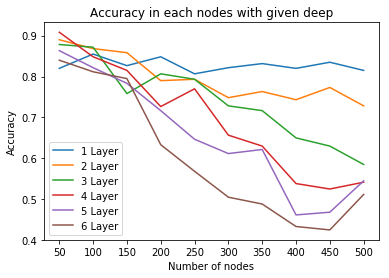

In [65]:
model_name = ['1 Layer','2 Layer','3 Layer','4 Layer','5 Layer','6 Layer']
for j in range(6):
    plt.plot(accuracy_list_with_diff_layers_node[10*j:10*(j+1)],label=model_name[j])
plt.xticks(np.arange(len(accuracy_list_with_diff_layers_node[:10])), [i for i in range(50,550,50)])
plt.legend(loc="best")
plt.ylabel('Accuracy')
plt.xlabel('Number of nodes')
plt.title('Accuracy in each nodes with given deep')

In [16]:
accuracy_list = []
activation_list = [tf.nn.relu,tf.nn.elu,tf.sigmoid,tf.tanh,tf.nn.softplus]
for acti_function in activation_list:
    print('Model:',str(acti_function))
    for i in range(1,11):
        node = i*10
        n_node_hl1 = node
        n_node_hl2 = node

        n_classes = 4
        batch_size = 50

        x = tf.placeholder('float', [None,20])
        y = tf.placeholder('int32',[None,4])   ## int didn't work

        def nn_model(data):
            hidden_1 = {'weights': tf.Variable(tf.random_normal([20,n_node_hl1])),
                       'biases': tf.Variable(tf.random_normal([n_node_hl1]))}

            hidden_2 = {'weights': tf.Variable(tf.random_normal([n_node_hl1,n_node_hl2])),
                       'biases': tf.Variable(tf.random_normal([n_node_hl2]))}

            output_l = {'weights': tf.Variable(tf.random_normal([n_node_hl2,n_classes])),
                     'biases': tf.Variable(tf.random_normal([n_classes]))}


            l1 = tf.add(tf.matmul(data,hidden_1['weights']),hidden_1['biases'])
            l1 = acti_function(l1)

            l2 = tf.add(tf.matmul(l1,hidden_2['weights']),hidden_2['biases'])
            l2 = acti_function(l2)

            output = tf.add(tf.matmul(l2, output_l['weights']),output_l['biases'])

            return output
        train_nn(x,nn_model)

Model: <function relu at 0x000001ABAF9529D8>
Acc: 0.87666667
Acc: 0.845
Acc: 0.78333336
Acc: 0.75666666
Acc: 0.70666665
Acc: 0.745
Acc: 0.70166665
Acc: 0.7
Acc: 0.67833334
Acc: 0.6533333
Model: <function elu at 0x000001ABAF9256A8>
Acc: 0.9316667
Acc: 0.7866667
Acc: 0.6766667
Acc: 0.75333333
Acc: 0.79
Acc: 0.75333333
Acc: 0.7866667
Acc: 0.68833333
Acc: 0.75166667
Acc: 0.71666664
Model: <function sigmoid at 0x000001ABAFA0EE18>
Acc: 0.88166666
Acc: 0.86833334
Acc: 0.895
Acc: 0.895
Acc: 0.905
Acc: 0.87166667
Acc: 0.90166664
Acc: 0.87666667
Acc: 0.8883333
Acc: 0.89666665
Model: <function tanh at 0x000001ABAFA0EF28>
Acc: 0.485
Acc: 0.7683333
Acc: 0.78833336
Acc: 0.5283333
Acc: 0.62166667
Acc: 0.6766667
Acc: 0.5883333
Acc: 0.5516667
Acc: 0.59833336
Acc: 0.5366667
Model: <function softplus at 0x000001ABAF927620>
Acc: 0.8333333
Acc: 0.8066667
Acc: 0.84166664
Acc: 0.84
Acc: 0.81666666
Acc: 0.815
Acc: 0.74833333
Acc: 0.77666664
Acc: 0.78
Acc: 0.755


In [17]:
accuracy_list_with_diff_acti = accuracy_list

Text(0.5,1,'Accuracy in each Number of Nodes')

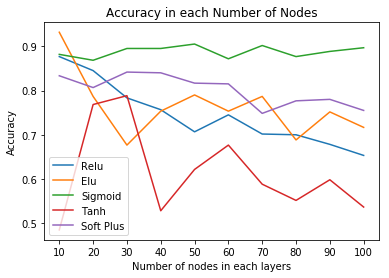

In [20]:
plt.plot(accuracy_list_with_diff_acti[:10],label='Relu')
plt.plot(accuracy_list_with_diff_acti[10:20],label='Elu')
plt.plot(accuracy_list_with_diff_acti[20:30],label='Sigmoid')
plt.plot(accuracy_list_with_diff_acti[30:40],label='Tanh')
plt.plot(accuracy_list_with_diff_acti[40:50],label='Soft Plus')
plt.legend(loc="best")
plt.xticks(np.arange(len(accuracy_list_with_diff_acti[:10])), [i*10 for i in range(1,11)])
plt.ylabel('Accuracy')
plt.xlabel('Number of nodes in each layers')
plt.title('Accuracy in each Number of Nodes')

In [21]:
# different optimizer
accuracy_list = []
for i in range(1,11):
    lr = 0.005*i
    opt_list =  [tf.train.GradientDescentOptimizer(learning_rate=lr),tf.train.AdagradOptimizer(learning_rate=lr), tf.train.MomentumOptimizer(learning_rate=lr,momentum=0.005),tf.train.AdamOptimizer(learning_rate=lr),tf.train.RMSPropOptimizer(learning_rate=lr)]
    for opt in opt_list:
        def train_nn_dif_opt_lr(x,model):
            pred = model(x)
            cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=pred, labels=y))
            # Array dtype float > int
            # https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.ndarray.astype.html
            optimizer = opt.minimize(cost)

            epoch = 100
            #with tf.Session(config=tf.ConfigProto(log_device_placement=True)) as sess:
            with tf.Session() as sess:
                sess.run(tf.global_variables_initializer())

                for ep in range(epoch):
                    epoch_loss = 0
                    for i in range(int(X_train.shape[0]/batch_size)):
                        beg = i*batch_size
                        end = beg + batch_size
                        ep_x = X_train[beg:end]
                        ep_y = y_train[beg:end]
                        qq, c = sess.run([optimizer,cost],feed_dict= {x:ep_x,y:ep_y})
        #                 ValueError: setting an array element with a sequence.
        #                 TypeError: 'DataFrame' objects are mutable, thus they cannot be hashed
                        epoch_loss += c
                    #print('Epoch',ep, 'completed out of', epoch, 'loss',epoch_loss)
                correct = tf.equal(tf.argmax(pred,1),tf.argmax(y,1))
                accuracy = tf.reduce_mean(tf.cast(correct,'float'))
                Acc = accuracy.eval({x:X_test, y:y_test})
                accuracy_list.append(Acc)
                print('Acc:',Acc)
        node = 50
        n_node_hl1 = node
        n_node_hl2 = node
        
        n_classes = 4
        batch_size = 50

        x = tf.placeholder('float', [None,20])
        y = tf.placeholder('int32',[None,4])   ## int didn't work

        def nn_model(data):
            hidden_1 = {'weights': tf.Variable(tf.random_normal([20,n_node_hl1])),
                       'biases': tf.Variable(tf.random_normal([n_node_hl1]))}

            hidden_2 = {'weights': tf.Variable(tf.random_normal([n_node_hl1,n_node_hl2])),
                       'biases': tf.Variable(tf.random_normal([n_node_hl2]))}

            output_l = {'weights': tf.Variable(tf.random_normal([n_node_hl2,n_classes])),
                     'biases': tf.Variable(tf.random_normal([n_classes]))}


            l1 = tf.add(tf.matmul(data,hidden_1['weights']),hidden_1['biases'])
            l1 = tf.nn.sigmoid(l1)

            l2 = tf.add(tf.matmul(l1,hidden_2['weights']),hidden_2['biases'])
            l2 = tf.nn.sigmoid(l2)

            output = tf.add(tf.matmul(l2, output_l['weights']),output_l['biases'])

            return output
        train_nn_dif_opt_lr(x,nn_model)

Acc: 0.43666667
Acc: 0.535
Acc: 0.39833334
Acc: 0.90166664
Acc: 0.9066667
Acc: 0.51666665
Acc: 0.61333334
Acc: 0.565
Acc: 0.90833336
Acc: 0.9066667
Acc: 0.61333334
Acc: 0.68333334
Acc: 0.615
Acc: 0.865
Acc: 0.895
Acc: 0.61
Acc: 0.78333336
Acc: 0.62833333
Acc: 0.9
Acc: 0.88666666
Acc: 0.77
Acc: 0.845
Acc: 0.73
Acc: 0.8983333
Acc: 0.89166665
Acc: 0.77666664
Acc: 0.85
Acc: 0.7733333
Acc: 0.90166664
Acc: 0.9066667
Acc: 0.82
Acc: 0.87166667
Acc: 0.75166667
Acc: 0.88666666
Acc: 0.86833334
Acc: 0.82
Acc: 0.87333333
Acc: 0.7866667
Acc: 0.8833333
Acc: 0.8983333
Acc: 0.81666666
Acc: 0.90166664
Acc: 0.855
Acc: 0.89
Acc: 0.8233333
Acc: 0.835
Acc: 0.90833336
Acc: 0.87
Acc: 0.89666665
Acc: 0.8833333


In [22]:
accuracy_list_with_diff_opt_lr = accuracy_list

In [24]:
GD = []
Adagrad = []
Mom = []
Adam = []
RMS = []
for i in range(10):
    GD.append(accuracy_list_with_diff_opt_lr[i*5])
    Adagrad.append(accuracy_list_with_diff_opt_lr[i*5+1])
    Mom.append(accuracy_list_with_diff_opt_lr[i*5+2])
    Adam.append(accuracy_list_with_diff_opt_lr[i*5+3])
    RMS.append(accuracy_list_with_diff_opt_lr[i*5+4])
    

Text(0.5,1,'Accuracy in each Learning Rate')

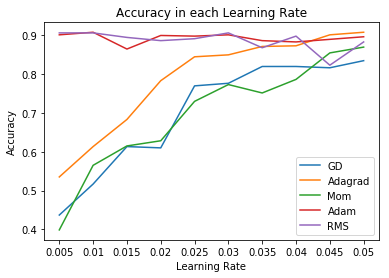

In [25]:
plt.plot(GD,label='GD')
plt.plot(Adagrad,label='Adagrad')
plt.plot(Mom,label='Mom')
plt.plot(Adam,label='Adam')
plt.plot(RMS,label='RMS')
plt.legend(loc="best")
plt.xticks(np.arange(len(GD)), [i*0.005 for i in range(1,11)])
plt.ylabel('Accuracy')
plt.xlabel('Learning Rate')
plt.title('Accuracy in each Learning Rate')

In [16]:
node = 50
n_node_hl1 = node
n_node_hl2 = node

n_classes = 4
batch_size = 50

x = tf.placeholder('float', [None,20])
y = tf.placeholder('int32',[None,4])   ## int didn't work
def nn_model(data):
    hidden_1 = {'weights': tf.Variable(tf.random_normal([20,n_node_hl1])),
               'biases': tf.Variable(tf.random_normal([n_node_hl1]))}

    hidden_2 = {'weights': tf.Variable(tf.random_normal([n_node_hl1,n_node_hl2])),
               'biases': tf.Variable(tf.random_normal([n_node_hl2]))}

    output_l = {'weights': tf.Variable(tf.random_normal([n_node_hl2,n_classes])),
             'biases': tf.Variable(tf.random_normal([n_classes]))}


    l1 = tf.add(tf.matmul(data,hidden_1['weights']),hidden_1['biases'])
    l1 = tf.nn.sigmoid(l1)

    l2 = tf.add(tf.matmul(l1,hidden_2['weights']),hidden_2['biases'])
    l2 = tf.nn.sigmoid(l2)

    output = tf.add(tf.matmul(l2, output_l['weights']),output_l['biases'])

    return output

In [19]:
accuracy_list=[]
train_list = []
def train_nn_w_lr(x,model):
    pred = model(x)
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=pred, labels=y))
    # Array dtype float > int
    # https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.ndarray.astype.html
    optimizer = tf.train.AdamOptimizer(learning_rate=0.05).minimize(cost)
    
    epoch = 100
    #with tf.Session(config=tf.ConfigProto(log_device_placement=True)) as sess:
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for j in range(1,6):
            print(j)
            for ep in range(epoch):
                epoch_loss = 0
                for i in range(int(X_train.shape[0]/5/batch_size*j)):
                    beg = i*batch_size
                    end = beg + batch_size
                    ep_x = X_train[beg:end]
                    ep_y = y_train[beg:end]
    #                 DF                
    #                 ep_x = X_train[beg:end]
    #                 ep_y = y_train[y_train.columns[1:5]][beg:end]

    #                 x = X_train[beg:end]
    #                 y = y_train[beg:end]                
    #                 UnboundLocalError: local variable 'y' referenced before assignment

                    qq, c = sess.run([optimizer,cost],feed_dict= {x:ep_x,y:ep_y})
    #                 ValueError: setting an array element with a sequence.
    #                 TypeError: 'DataFrame' objects are mutable, thus they cannot be hashed
                    epoch_loss += c
                #print('Epoch',ep, 'completed out of', epoch, 'loss',epoch_loss)
            correct = tf.equal(tf.argmax(pred,1),tf.argmax(y,1))
            accuracy = tf.reduce_mean(tf.cast(correct,'float'))
            Acc = accuracy.eval({x:X_train, y:y_train})
            train_list.append(Acc)
            Acc = accuracy.eval({x:X_test, y:y_test})
            accuracy_list.append(Acc)
            print('Acc:',Acc)

In [20]:
train_nn_w_lr(x,nn_model)

1
Acc: 0.7866667
2
Acc: 0.895
3
Acc: 0.86
4
Acc: 0.8616667
5
Acc: 0.87666667


In [21]:
acc_lr_test = accuracy_list
acc_lr_train= train_list

Text(0.5,1,'Learning Curve')

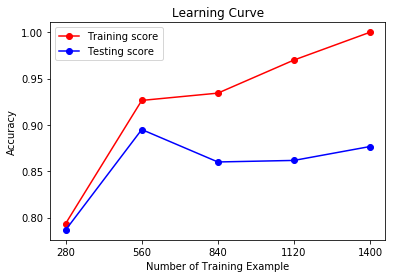

In [22]:
plt.plot(acc_lr_train, 'o-', color="r",
         label="Training score")
plt.plot(acc_lr_test, 'o-', color="b",
         label="Testing score")
plt.legend(loc="best")
plt.xticks(np.arange(5), [i for i in range(280,1401,280)])
plt.ylabel('Accuracy')
plt.xlabel('Number of Training Example')
plt.title('Learning Curve')

In [26]:
accuracy_list=[]
train_list = []
def train_nn_w_ep(x,model):
    pred = model(x)
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=pred, labels=y))
    # Array dtype float > int
    # https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.ndarray.astype.html
    optimizer = tf.train.AdamOptimizer(learning_rate=0.05).minimize(cost)
    for j in range(100,1000,100):
        epoch = j
        print(j)
        #with tf.Session(config=tf.ConfigProto(log_device_placement=True)) as sess:
        with tf.Session() as sess:
            sess.run(tf.global_variables_initializer())
            for ep in range(epoch):
                epoch_loss = 0
                for i in range(int(X_train.shape[0]/batch_size)):
                    beg = i*batch_size
                    end = beg + batch_size
                    ep_x = X_train[beg:end]
                    ep_y = y_train[beg:end]
    #                 DF                
    #                 ep_x = X_train[beg:end]
    #                 ep_y = y_train[y_train.columns[1:5]][beg:end]

    #                 x = X_train[beg:end]
    #                 y = y_train[beg:end]                
    #                 UnboundLocalError: local variable 'y' referenced before assignment

                    qq, c = sess.run([optimizer,cost],feed_dict= {x:ep_x,y:ep_y})
    #                 ValueError: setting an array element with a sequence.
    #                 TypeError: 'DataFrame' objects are mutable, thus they cannot be hashed
                    epoch_loss += c
                #print('Epoch',ep, 'completed out of', epoch, 'loss',epoch_loss)
            correct = tf.equal(tf.argmax(pred,1),tf.argmax(y,1))
            accuracy = tf.reduce_mean(tf.cast(correct,'float'))
            Acc = accuracy.eval({x:X_train, y:y_train})
            train_list.append(Acc)
            Acc = accuracy.eval({x:X_test, y:y_test})
            accuracy_list.append(Acc)
            print('Acc:',Acc)

In [27]:
train_nn_w_ep(x,nn_model)

100
Acc: 0.87333333
200
Acc: 0.8233333
300
Acc: 0.8666667
400
Acc: 0.865
500
Acc: 0.86333334
600
Acc: 0.87
700
Acc: 0.87166667
800
Acc: 0.87166667
900
Acc: 0.87333333


In [28]:
acc_ep_test = accuracy_list
acc_ep_train= train_list

Text(0.5,1,'Validation Curve with Epoch')

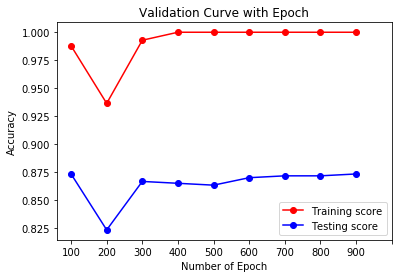

In [29]:
plt.plot(acc_ep_train,  'o-', color="r",
         label="Training score")
plt.plot(acc_ep_test,  'o-', color="b",
         label="Testing score")
plt.legend(loc="best")
plt.xticks(np.arange(10), [i for i in range(100,1000,100)])
plt.ylabel('Accuracy')
plt.xlabel('Number of Epoch')
plt.title('Validation Curve with Epoch')

In [30]:
accuracy_list=[]
train_list = []
def train_nn_w_batch(x,model):
    pred = model(x)
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=pred, labels=y))
    # Array dtype float > int
    # https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.ndarray.astype.html
    optimizer = tf.train.AdamOptimizer(learning_rate=0.005).minimize(cost)
    for j in [20,40,70,100,140]:
        epoch = 100
        print(j)
        #with tf.Session(config=tf.ConfigProto(log_device_placement=True)) as sess:
        with tf.Session() as sess:
            sess.run(tf.global_variables_initializer())
            for ep in range(epoch):
                epoch_loss = 0
                for i in range(int(X_train.shape[0]/j)):
                    beg = i*batch_size
                    end = beg + batch_size
                    ep_x = X_train[beg:end]
                    ep_y = y_train[beg:end]
    #                 DF                
    #                 ep_x = X_train[beg:end]
    #                 ep_y = y_train[y_train.columns[1:5]][beg:end]

    #                 x = X_train[beg:end]
    #                 y = y_train[beg:end]                
    #                 UnboundLocalError: local variable 'y' referenced before assignment

                    qq, c = sess.run([optimizer,cost],feed_dict= {x:ep_x,y:ep_y})
    #                 ValueError: setting an array element with a sequence.
    #                 TypeError: 'DataFrame' objects are mutable, thus they cannot be hashed
                    epoch_loss += c
                #print('Epoch',ep, 'completed out of', epoch, 'loss',epoch_loss)
            correct = tf.equal(tf.argmax(pred,1),tf.argmax(y,1))
            accuracy = tf.reduce_mean(tf.cast(correct,'float'))
            Acc = accuracy.eval({x:X_train, y:y_train})
            train_list.append(Acc)
            Acc = accuracy.eval({x:X_test, y:y_test})
            accuracy_list.append(Acc)
            print('Acc:',Acc)

In [31]:
train_nn_w_batch(x,nn_model)

20
Acc: 0.8666667
40
Acc: 0.8833333
70
Acc: 0.89166665
100
Acc: 0.8983333
140
Acc: 0.88


In [32]:
acc_batch_test = accuracy_list
acc_batch_train= train_list

Text(0.5,1,'Validation Curve with Batch size')

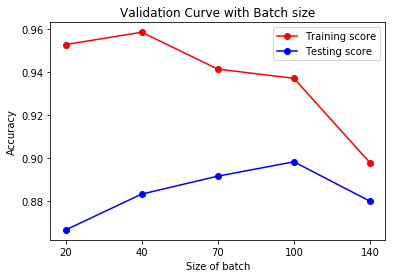

In [33]:
plt.plot(acc_batch_train,  'o-', color="r",
         label="Training score")
plt.plot(acc_batch_test,  'o-', color="b",
         label="Testing score")
plt.legend(loc="best")
plt.xticks(np.arange(5), [20,40,70,100,140])
plt.ylabel('Accuracy')
plt.xlabel('Size of batch')
plt.title('Validation Curve with Batch size')